In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, KFold, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import f1_score, confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report, make_scorer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn import tree 
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [203]:
df_final = pd.read_csv('Data/Final_NBA_Seasons1-3_1977_final.csv', index_col = 0)
df_final.set_index('Player', inplace = True)

In [204]:
cols = ['MP','FG','2P','FT','TRB','AST','STL','TOV','PTS','roy','all_rookie_1','all_rookie_2','WS_1','GS_1','MP_1','PTS_1','ppg_1','apg_1','rpg_1','spg_1','bpg_1',
        'tpg_1','ftpg_1','PER_1','WS/48_1','VORP_1','WS_2','GS_2','MP_2','ppg_2','apg_2','rpg_2','spg_2','bpg_2','tpg_2','ftpg_2','PER_2','USG%_2',
        'ORtg_2','DRtg_2','OWS_2','DWS_2','WS/48_2','VORP_2','WS_3','GS_3','MP_3','PTS_3','TS%_3','ppg_3','apg_3','rpg_3','spg_3','bpg_3','tpg_3','ftpg_3','PER_3','USG%_3',
        'ORtg_3','DRtg_3','OWS_3','DWS_3','WS/48_3','VORP_3','target',]

df = df_final[cols]

In [205]:
df = df.fillna(0)
df.head()

,MP,FG,2P,FT,TRB,AST,STL,TOV,PTS,roy,...,ftpg_3,PER_3,USG%_3,ORtg_3,DRtg_3,OWS_3,DWS_3,WS/48_3,VORP_3,target
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green\greenac01,6418.0,847,846,615,1706.0,231,206.0,321.0,2310,0.0,...,3.573171,14.5,14.7,119.0,106.0,4.5,3.4,0.144,1.5,0
A.J. Price\priceaj01,2228.0,318,191,142,221.0,303,84.0,144.0,905,0.0,...,0.636364,11.5,17.7,100.0,106.0,0.2,0.5,0.063,0.1,0
Aaron Brooks\brookaa01,5525.0,984,626,436,428.0,759,128.0,401.0,2762,0.0,...,2.987805,16.0,25.7,108.0,112.0,3.9,1.6,0.091,1.9,0
Aaron Gordon\gordoaa01,4958.0,760,628,329,1081.0,311,145.0,193.0,1981,0.0,...,1.950000,14.5,20.1,107.0,111.0,2.0,1.7,0.077,0.6,0
Aaron Gray\grayaa01,1639.0,226,226,110,494.0,109,44.0,115.0,562,0.0,...,0.625000,16.6,16.4,115.0,106.0,0.5,0.4,0.142,0.1,0


In [206]:
all_nba = df[df['target'] == 1]
all_nba.index.to_list()

['Al Horford\\horfoal01',
 'Allen Iverson\\iversal01',
 "Amar'e Stoudemire\\stoudam01",
 'Andre Drummond\\drumman01',
 'Andrew Bogut\\bogutan01',
 'Anfernee Hardaway\\hardaan01',
 'Anthony Davis\\davisan02',
 'Antonio McDyess\\mcdyean01',
 'Baron Davis\\davisba01',
 'Bernard King\\kingbe01',
 'Blake Griffin\\griffbl01',
 'Brad Daugherty\\daughbr01',
 'Brandon Roy\\roybr01',
 'Carlos Boozer\\boozeca01',
 'Carmelo Anthony\\anthoca01',
 'Charles Barkley\\barklch01',
 'Chris Bosh\\boshch01',
 'Chris Mullin\\mullich01',
 'Chris Paul\\paulch01',
 'Chris Webber\\webbech01',
 'Clyde Drexler\\drexlcl01',
 'Dale Ellis\\ellisda01',
 'Damian Lillard\\lillada01',
 'David Robinson\\robinda01',
 'DeMarcus Cousins\\couside01',
 'Dennis Rodman\\rodmade01',
 'Deron Williams\\willide01',
 'Derrick Coleman\\colemde01',
 'Dirk Nowitzki\\nowitdi01',
 'Dominique Wilkins\\wilkido01',
 'Draymond Green\\greendr01',
 'Dwight Howard\\howardw01',
 'Dwyane Wade\\wadedw01',
 'Eddie Jones\\jonesed02',
 'Fat Lever\\le

In [25]:
X = df.drop(columns = 'target')
y = df['target']

X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size= .8, random_state= 42)

In [492]:
weight = ((1 /(y_train.value_counts(normalize = True)))/1.076110).values

In [493]:
weights = {0:weight[0],
          1:weight[1]}

In [494]:
weights

{0: 0.9999999410609073, 1: 13.1388881144947}

In [512]:
nba_scaled = StandardScaler()

nba_scaled.fit(X_train)
X_train_sc = pd.DataFrame(nba_scaled.transform(X_train), index = X_train.index, columns = X_train.columns)
X_test_sc = pd.DataFrame(nba_scaled.transform(X_test), index = X_test.index, columns = X_test.columns)

#### RFE Logistic Regression Model

In [483]:
rfe_lr = RFECV(estimator=LogisticRegression(class_weight = 'balanced', max_iter = 1000), step = 1, cv = 3, scoring = 'precision', n_jobs = -1, verbose = 1)
rfe_lr.fit(X_train_sc, y_train)
X_train_sc.columns[rfe_lr.get_support()]

Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 fe

Index(['2P', 'TRB', 'PTS', 'spg_1', 'ppg_2', 'PER_2', 'MP_3', 'PTS_3', 'TS%_3',
       'spg_3', 'PER_3', 'VORP_3'],
      dtype='object')

In [316]:
cross_val_score(rfe_lr, X_train_sc, y_train, cv=3)

Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 fe

array([0.90588235, 0.90855457, 0.86430678])

In [317]:
selected_rfe = X_train_sc.columns[rfe_lr.support_]
removed_rfe = X_train_sc.columns[~rfe_lr.support_]

In [318]:
#instantiate a logistic regression object
lr_rfe = LogisticRegression(class_weight = 'balanced')

#fit the linear regression to the data
lr_rfe = lm_rfe.fit(X_train_sc[selected_rfe], y_train)

#Use the model to predict on the training and test set
y_rfe = lm_rfe.predict(X_train_sc[selected_rfe])

In [319]:
y_train_pred_rfe = lr_rfe.predict(X_train_sc[selected_rfe])
y_pred_rfe = lr_rfe.predict(X_test_sc[selected_rfe])

In [320]:
acc_rfe = accuracy_score(y_test, y_pred_rfe)
prec_rfe = precision_score(y_test, y_pred_rfe)
rec_rfe = recall_score(y_test, y_pred_rfe)
f1_rfe = f1_score(y_test, y_pred_rfe)

results = pd.DataFrame([['LR_RFE Model', acc_rfe, prec_rfe, rec_rfe, f1_rfe]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
# results = results.append(rfe_model, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,LR_RFE Model,0.894118,0.384615,0.833333,0.526316


In [321]:
rfe_rf = RFECV(estimator=RandomForestClassifier(random_state = 42))
rfe_rf.fit(X_train_sc, y_train)
X_train_sc.columns[rfe_selector.get_support()]

Index(['2P', 'TRB', 'PTS', 'spg_1', 'ppg_2', 'PER_2', 'MP_3', 'PTS_3', 'TS%_3',
       'spg_3', 'PER_3', 'VORP_3'],
      dtype='object')

In [322]:
selected_rfe = X_train_sc.columns[rfe_rf.support_]
removed_rfe = X_train_sc.columns[~rfe_rf.support_]

In [369]:
X_train[[ 'TRB', 'PTS', 'ppg_2', 'PER_2', 'MP_3', 'PTS_3', 'TS%_3',
       'spg_3', 'PER_3', 'VORP_3']].corr()

,TRB,PTS,ppg_2,PER_2,MP_3,PTS_3,TS%_3,spg_3,PER_3,VORP_3
TRB,1.000000,0.702601,0.626824,0.545663,0.647238,0.625867,0.310550,0.313820,0.517104,0.508001
PTS,0.702601,1.000000,0.934921,0.633662,0.796804,0.898308,0.314160,0.603171,0.609791,0.694026
ppg_2,0.626824,0.934921,1.000000,0.689106,0.659851,0.778592,0.229082,0.547472,0.534220,0.600544
PER_2,0.545663,0.633662,0.689106,1.000000,0.488120,0.571536,0.301426,0.415372,0.581705,0.566160
MP_3,0.647238,0.796804,0.659851,0.488120,1.000000,0.918940,0.401441,0.643711,0.553914,0.659984
PTS_3,0.625867,0.898308,0.778592,0.571536,0.918940,1.000000,0.399158,0.622068,0.664616,0.753422
TS%_3,0.310550,0.314160,0.229082,0.301426,0.401441,0.399158,1.000000,0.237658,0.630986,0.415196
spg_3,0.313820,0.603171,0.547472,0.415372,0.643711,0.622068,0.237658,1.000000,0.502415,0.657844
PER_3,0.517104,0.609791,0.534220,0.581705,0.553914,0.664616,0.630986,0.502415,1.000000,0.710580
VORP_3,0.508001,0.694026,0.600544,0.566160,0.659984,0.753422,0.415196,0.657844,0.710580,1.000000


In [370]:
#instantiate a RF object
rf_rfe = RandomForestClassifier(random_state = 42)

#fit the linear regression to the data
rf_rfe = rf_rfe.fit(X_train_sc[selected_rfe], y_train)

#Use the model to predict on the training and test set
y_rfe = rf_rfe.predict(X_train_sc[selected_rfe])

In [371]:
y_train_pred_rfe = rf_rfe.predict(X_train_sc[selected_rfe])
y_pred_rfe = rf_rfe.predict(X_test_sc[selected_rfe])

In [372]:
acc_rfe = accuracy_score(y_test, y_pred_rfe)
prec_rfe = precision_score(y_test, y_pred_rfe)
rec_rfe = recall_score(y_test, y_pred_rfe)
f1_rfe = f1_score(y_test, y_pred_rfe)

rf_rfe = pd.DataFrame([['RF_RFE Model', acc_rfe, prec_rfe, rec_rfe, f1_rfe]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(rf_rfe, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,LR_RFE Model,0.894118,0.384615,0.833333,0.526316
1,RF_RFE Model,0.941176,0.600000,0.500000,0.545455
2,RF_RFE Model,0.941176,0.600000,0.500000,0.545455


#### ...

In [430]:
#final columns based on recursive feature elimination
final_cols = ['2P', 'TRB', 'PTS', 'spg_1', 'ppg_2', 'PER_2', 'MP_3', 'PTS_3', 'TS%_3',
       'spg_3', 'PER_3', 'VORP_3']

In [431]:
# create function to call for evaluation of each model

def metrics_score(train_preds, y_train, test_preds, y_test):
    print(f"Training Accuracy:\t{accuracy_score(y_train, train_preds):.4}",
          f"\tTesting Accuracy:\t{accuracy_score(y_test, test_preds):.4}")
    print(f"Training Precision:\t{precision_score(y_train, train_preds):.4}",
          f"\tTesting Precision:\t{precision_score(y_test, test_preds):.4}")
    print(f"Training Recall:\t{recall_score(y_train, train_preds):.4}",
          f"\tTesting Recall:\t\t{recall_score(y_test, test_preds):.4}")
    print(f"Training F1:\t\t{f1_score(y_train, train_preds):.4}",
          f"\tTesting F1:\t\t{f1_score(y_test, test_preds):.4}")

#### Logistic Regression GS Model w/ RFE selected features

In [513]:
ss = StandardScaler()
train_scaled = ss.fit_transform(X_train[final_cols])
test_scaled = ss.transform(X_test[final_cols])

scorer = make_scorer(precision_score)

In [514]:
C = np.logspace(0, 1, 10)

params = dict(C=C, max_iter=[50, 100])

logistic = LogisticRegression(penalty='l2', class_weight=weights, random_state=42)

grid_search_LR = GridSearchCV(estimator = logistic,scoring=scorer, param_grid = params, 
                              cv = 3, n_jobs = -1, verbose = 2)

In [515]:
grid_search_LR.fit(train_scaled, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.5s finished


GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight={0: 0.9999999410609073,
                                                        1: 13.1388881144947},
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': array([ 1.        ,  1.29154967,  1.66810054,  2.15443469,  2.7825594 ,
        3.59381366,  4.64158883,  5.9948425 ,  7.74263683, 10.        ]),
                         'max_iter': [50, 100]},
             scoring=make_scorer(precision_score), verbose=2)

In [516]:
lr_train_preds = grid_search_LR.best_estimator_.predict(train_scaled)
lr_test_preds = grid_search_LR.best_estimator_.predict(test_scaled)
metrics_score(lr_train_preds, y_train, lr_test_preds, y_test)

Training Accuracy:	0.9008 	Testing Accuracy:	0.8941
Training Precision:	0.411 	Testing Precision:	0.3846
Training Recall:	0.9306 	Testing Recall:		0.8333
Training F1:		0.5702 	Testing F1:		0.5263


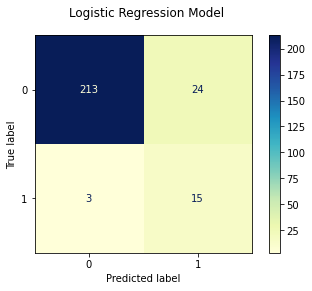

In [517]:
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression Model")

plot_confusion_matrix(grid_search_LR, test_scaled, y_test, ax=ax, cmap="YlGnBu");

##### w/ resampling

In [518]:
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_sample(train_scaled, y_train.ravel())

C = np.logspace(0, 1, 10)

params = dict(C=C, max_iter=[50, 100])

logistic = LogisticRegression(penalty='l2', class_weight=weights, random_state=42)

grid_search_LR_sm = GridSearchCV(estimator = logistic,scoring=scorer, param_grid = params, 
                              cv = 3, n_jobs = -1, verbose = 2)
grid_search_LR_sm.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.5s finished
/Users/ryanlewis/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight={0: 0.9999999410609073,
                                                        1: 13.1388881144947},
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': array([ 1.        ,  1.29154967,  1.66810054,  2.15443469,  2.7825594 ,
        3.59381366,  4.64158883,  5.9948425 ,  7.74263683, 10.        ]),
                         'max_iter': [50, 100]},
             scoring=make_scorer(precision_score), verbose=2)

In [519]:
lr_train_preds_sm = grid_search_LR_sm.best_estimator_.predict(X_train_res)
lr_test_preds_sm = grid_search_LR_sm.best_estimator_.predict(test_scaled)
metrics_score(lr_train_preds_sm, y_train_res, lr_test_preds_sm, y_test)

Training Accuracy:	0.8705 	Testing Accuracy:	0.7412
Training Precision:	0.7978 	Testing Precision:	0.2
Training Recall:	0.9926 	Testing Recall:		0.8889
Training F1:		0.8846 	Testing F1:		0.3265


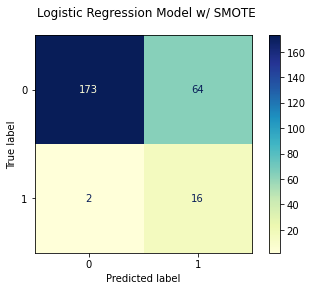

In [520]:
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression Model w/ SMOTE")

plot_confusion_matrix(grid_search_LR_sm, test_scaled, y_test, ax=ax, cmap="YlGnBu");

#### Random Forest GS Model w/ RFE Features

In [496]:
weights_2 = {0: 1, 1: 20}

In [521]:
params = { 
    'n_estimators': [10, 25, 50, 100, 200, 500],
    'max_features': ['sqrt', 'auto', 'log2'],
    'max_depth' : [2,4,6,8,10,12,15,20],
    'criterion' :['gini', 'entropy'],
    'class_weight' : [weights, weights_2, 'balanced', 'none']
}

rf = RandomForestClassifier(random_state = 42)

grid_search_RF = GridSearchCV(estimator=rf, param_grid=params, scoring=scorer, 
                              cv = 3, n_jobs = -1, verbose = 2)

In [522]:
grid_search_RF.fit(train_scaled, y_train)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 10.6min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [{0: 0.9999999410609073,
                                           1: 13.1388881144947},
                                          {0: 1, 1: 20}, 'balanced', 'none'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 15, 20],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'n_estimators': [10, 25, 50, 100, 200, 500]},
             scoring=make_scorer(precision_score), verbose=2)

In [523]:
grid_search_RF.best_params_

{'class_weight': {0: 0.9999999410609073, 1: 13.1388881144947},
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'sqrt',
 'n_estimators': 10}

In [524]:
rf_train_preds = grid_search_RF.best_estimator_.predict(train_scaled)
rf_test_preds = grid_search_RF.best_estimator_.predict(test_scaled)
metrics_score(rf_train_preds, y_train, rf_test_preds, y_test)

Training Accuracy:	0.9961 	Testing Accuracy:	0.9294
Training Precision:	0.9857 	Testing Precision:	0.5
Training Recall:	0.9583 	Testing Recall:		0.4444
Training F1:		0.9718 	Testing F1:		0.4706


Feature: 0, Score: 0.03062
Feature: 1, Score: 0.03238
Feature: 2, Score: 0.19911
Feature: 3, Score: 0.03404
Feature: 4, Score: 0.10418
Feature: 5, Score: 0.13113
Feature: 6, Score: 0.02413
Feature: 7, Score: 0.09974
Feature: 8, Score: 0.04844
Feature: 9, Score: 0.07746
Feature: 10, Score: 0.09685
Feature: 11, Score: 0.12191


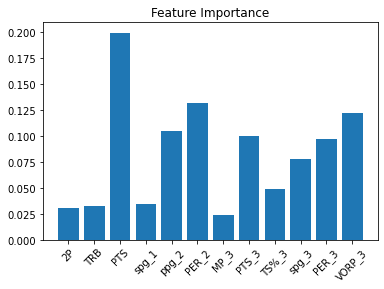

In [525]:
importance = grid_search_RF.best_estimator_.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['2P', 'TRB', 'PTS', 'spg_1', 'ppg_2', 'PER_2', 'MP_3', 'PTS_3', 'TS%_3',
       'spg_3', 'PER_3', 'VORP_3'], rotation = 45)
plt.title('Feature Importance')
plt.show()
# plt.savefig('feature_importance.png')

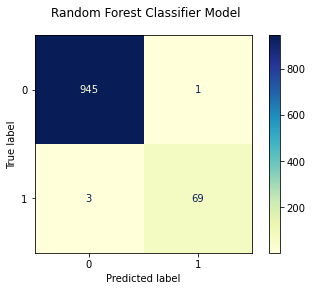

In [526]:
fig, ax = plt.subplots()

fig.suptitle("Random Forest Classifier Model")

plot_confusion_matrix(grid_search_RF, train_scaled, y_train, ax=ax, cmap="YlGnBu");


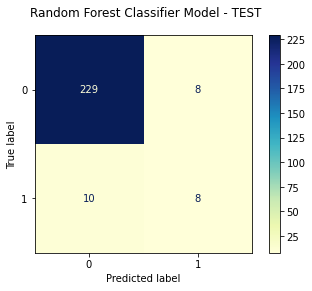

In [527]:
fig, ax = plt.subplots()

fig.suptitle("Random Forest Classifier Model - TEST")

plot_confusion_matrix(grid_search_RF, test_scaled, y_test, ax=ax, cmap="YlGnBu");
fig.savefig('RF_CM')

##### w/ SMOTE resampling

In [508]:
params = { 
    'n_estimators': [10, 25, 50, 100, 200, 500],
    'max_features': ['sqrt', 'auto', 'log2'],
    'max_depth' : [2,4,6,8,10,12,15,20],
    'criterion' :['gini', 'entropy'],
    'class_weight' : [weights, weights_2, 'balanced']
}

rf = RandomForestClassifier(random_state = 42)

grid_search_RF_sm = GridSearchCV(estimator=rf, param_grid=params, scoring=scorer, 
                              cv = 5, n_jobs = -1, verbose = 2)

grid_search_RF_sm.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 182 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 385 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1033 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1478 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 2005 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 2612 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 3301 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 4070 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 25.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [{0: 0.9999999410609073,
                                           1: 13.1388881144947},
                                          {0: 1, 1: 20}, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 15, 20],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'n_estimators': [10, 25, 50, 100, 200, 500]},
             scoring=make_scorer(precision_score), verbose=2)

In [509]:
grid_search_RF_sm.best_params_

{'class_weight': {0: 1, 1: 20},
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 10}

In [510]:
rf_train_preds_sm = grid_search_RF_sm.best_estimator_.predict(X_train_res)
rf_test_preds_sm = grid_search_RF_sm.best_estimator_.predict(test_scaled)
metrics_score(rf_train_preds_sm, y_train_res, rf_test_preds_sm, y_test)

Training Accuracy:	0.9984 	Testing Accuracy:	0.9216
Training Precision:	1.0 	Testing Precision:	0.4545
Training Recall:	0.9968 	Testing Recall:		0.5556
Training F1:		0.9984 	Testing F1:		0.5


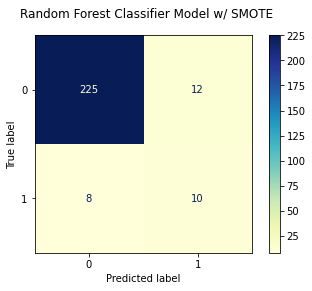

In [511]:
fig, ax = plt.subplots()

fig.suptitle("Random Forest Classifier Model w/ SMOTE")

plot_confusion_matrix(grid_search_RF_sm, test_scaled, y_test, ax=ax, cmap="YlGnBu");

#### Decision Tree GS w/ RFE 

In [451]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

params = dict(criterion=['gini', 'entropy'],
                max_depth=[2,4,6,8,10,12,15,20,25],
                 splitter = ['best', 'random'],
             )

DT = tree.DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')

grid_search_DT = GridSearchCV(estimator=DT, param_grid=params, scoring=scorer, 
                              cv = 5, n_jobs = -1, verbose = 2)

In [452]:
grid_search_DT.fit(train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.5s finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 15, 20, 25],
                         'splitter': ['best', 'random']},
             scoring=make_scorer(precision_score), verbose=2)

In [453]:
grid_search_DT.best_params_

{'criterion': 'gini', 'max_depth': 12, 'splitter': 'best'}

In [454]:
dt_train_preds = grid_search_DT.best_estimator_.predict(train_scaled)
dt_test_preds = grid_search_DT.best_estimator_.predict(test_scaled)
metrics_score(dt_train_preds, y_train, dt_test_preds, y_test)

Training Accuracy:	0.9833 	Testing Accuracy:	0.8941
Training Precision:	0.809 	Testing Precision:	0.3333
Training Recall:	1.0 	Testing Recall:		0.5
Training F1:		0.8944 	Testing F1:		0.4


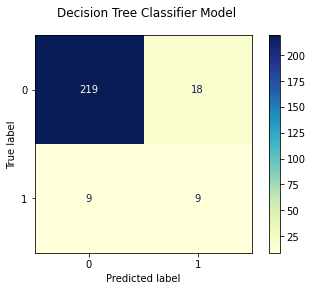

In [455]:
fig, ax = plt.subplots()

fig.suptitle("Decision Tree Classifier Model")

plot_confusion_matrix(grid_search_DT, test_scaled, y_test, ax=ax, cmap="YlGnBu");

##### w/ SMOTE

In [456]:
params = dict(criterion=['gini', 'entropy'],
                max_depth=[2,4,6,8,10,12,15,20,25],
                 splitter = ['best', 'random'],
             )

DT = tree.DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')


grid_search_DT_sm = GridSearchCV(estimator=DT, param_grid=params, scoring=scorer, 
                              cv = 5, n_jobs = -1, verbose = 2)

grid_search_DT_sm.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 173 out of 180 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.9s finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 15, 20, 25],
                         'splitter': ['best', 'random']},
             scoring=make_scorer(precision_score), verbose=2)

In [457]:
grid_search_DT_sm.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'splitter': 'random'}

In [458]:
dt_train_preds_sm = grid_search_DT_sm.best_estimator_.predict(X_train_res)
dt_test_preds_sm = grid_search_DT_sm.best_estimator_.predict(test_scaled)
metrics_score(dt_train_preds_sm, y_train_res, dt_test_preds_sm, y_test)

Training Accuracy:	0.9958 	Testing Accuracy:	0.9098
Training Precision:	0.9979 	Testing Precision:	0.3913
Training Recall:	0.9937 	Testing Recall:		0.5
Training F1:		0.9958 	Testing F1:		0.439


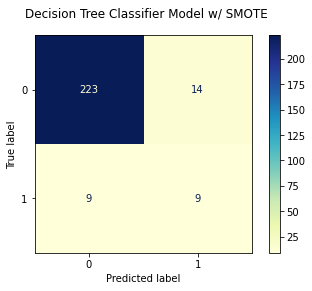

In [459]:
fig, ax = plt.subplots()

fig.suptitle("Decision Tree Classifier Model w/ SMOTE")

plot_confusion_matrix(grid_search_DT_sm, test_scaled, y_test, ax=ax, cmap="YlGnBu");

#### KNN GS w/ RFE Features

In [460]:
knn = KNeighborsClassifier()
params = {
    'n_neighbors': [3,5,11,15,19],
    'weights': ['uniform', 'distance'],
    'metric': ['eucilidean', 'manhattan', 'minkowski']
}

grid_knn = GridSearchCV(knn, params, verbose = 1,
                        cv = 3, n_jobs =-1)

In [461]:
grid_knn.fit(train_scaled, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.1s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['eucilidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 11, 15, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [462]:
grid_knn.best_params_

{'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'}

In [463]:
knn_train_preds = grid_knn.best_estimator_.predict(train_scaled)
knn_test_preds = grid_knn.best_estimator_.predict(test_scaled)
metrics_score(knn_train_preds, y_train, knn_test_preds, y_test)

Training Accuracy:	0.944 	Testing Accuracy:	0.9451
Training Precision:	0.7419 	Testing Precision:	0.7
Training Recall:	0.3194 	Testing Recall:		0.3889
Training F1:		0.4466 	Testing F1:		0.5


##### KNN w/ resampling

In [464]:
knn = KNeighborsClassifier()
params = {
    'n_neighbors': [3,5,11,15,19],
    'weights': ['uniform', 'distance'],
    'metric': ['eucilidean', 'manhattan', 'minkowski']
}

grid_knn_sm = GridSearchCV(knn, params, verbose = 1,
                        cv = 3, n_jobs =-1)

grid_knn_sm.fit(X_train_res, y_train_res)

print(grid_knn_sm.best_params_)

knn_train_preds_sm = grid_knn_sm.best_estimator_.predict(X_train_res)
knn_test_preds_sm = grid_knn_sm.best_estimator_.predict(test_scaled)
metrics_score(knn_train_preds_sm, y_train_res, knn_test_preds_sm, y_test)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}
Training Accuracy:	1.0 	Testing Accuracy:	0.8941
Training Precision:	1.0 	Testing Precision:	0.3714
Training Recall:	1.0 	Testing Recall:		0.7222
Training F1:		1.0 	Testing F1:		0.4906


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.0s finished


In [465]:
model_candidates = [
    
    {'name':'Logistic Regression',
     'accuracy score':accuracy_score(y_test, lr_test_preds),
     'recall score' : recall_score(y_test, lr_test_preds),
     'precision score' : precision_score(y_test,lr_test_preds),
         'f1 score':metrics.f1_score(y_test, lr_test_preds)},
    
    {'name':'Logistic Regression w/ Resampling',
     'accuracy score':accuracy_score(y_test, lr_test_preds_sm),
     'recall score' : recall_score(y_test, lr_test_preds_sm),
     'precision score' : precision_score(y_test,lr_test_preds_sm),
     'f1 score':metrics.f1_score(y_test, lr_test_preds_sm)},
    
    {'name':'Random Forest',
     'accuracy score':accuracy_score(y_test, rf_test_preds),
     'recall score' : recall_score(y_test, rf_test_preds,),
     'precision score' : precision_score(y_test,rf_test_preds),
    'f1 score':metrics.f1_score(y_test, rf_test_preds)},
    
    {'name':'Random Forest w/ Resampling',
     'accuracy score':accuracy_score(y_test, rf_test_preds_sm),
     'recall score' : recall_score(y_test, rf_test_preds_sm),
     'precision score' : precision_score(y_test,rf_test_preds_sm),
     'f1 score':metrics.f1_score(y_test, dt_test_preds)},
    
    {'name':'Decision Tree',
     'accuracy score':accuracy_score(y_test, dt_test_preds),
     'recall score' : recall_score(y_test, dt_test_preds),
     'precision score' : precision_score(y_test,dt_test_preds),
     'f1 score':metrics.f1_score(y_test, dt_test_preds)},
    
    {'name':'Decision Tree w/ Resampling',
     'accuracy score':accuracy_score(y_test, dt_test_preds_sm),
     'recall score' : recall_score(y_test, dt_test_preds_sm),
     'precision score' : precision_score(y_test,dt_test_preds_sm),
     'f1 score':metrics.f1_score(y_test, dt_test_preds_sm)},
    
]

In [466]:
final_scores_df = pd.DataFrame(model_candidates).set_index('name')
final_scores_df

,accuracy score,recall score,precision score,f1 score
name,,,,
Logistic Regression,0.894118,0.833333,0.384615,0.526316
Logistic Regression w/ Resampling,0.886275,0.777778,0.358974,0.491228
Random Forest,0.945098,0.333333,0.750000,0.461538
Random Forest w/ Resampling,0.925490,0.555556,0.476190,0.400000
Decision Tree,0.894118,0.500000,0.333333,0.400000
Decision Tree w/ Resampling,0.909804,0.500000,0.391304,0.439024


### PCA

In [209]:
pca = PCA(n_components= 3, random_state=42)

pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

In [210]:
pca.n_components_

3

In [212]:
pca_result = pca.fit_transform(X_train)
pca1 = pca_result[:,0]
pca2 = pca_result[:,1] 
pca3 = pca_result[:,2] 

target = pd.Categorical(y_train).codes

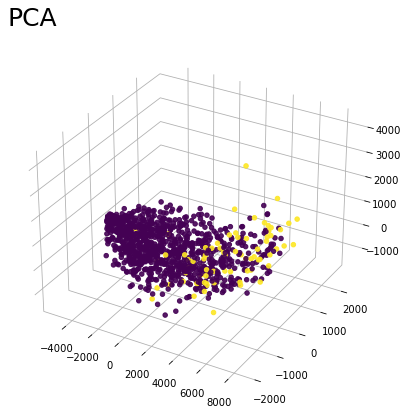

In [213]:
fig = plt.figure(figsize=(19, 7))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('PCA', fontsize=25, loc='left')
ax.scatter(xs=pca1, 
           ys=pca2, 
           zs=pca3, 
           c=target,
           alpha=.9,)

ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report, make_scorer
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import tree 
from xgboost import XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier, Booster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix,\
recall_score, precision_score, accuracy_score, log_loss,\
roc_curve, roc_auc_score, classification_report,plot_confusion_matrix
from sklearn.feature_selection import RFE, RFECV


In [98]:
RF = RandomForestClassifier(random_state = 42)
rfe = RFECV(estimator = DT, step =1, cv = 3, scoring = 'recall', n_jobs = -1, verbose = 1)
rfe = rfe.fit(X_train, y_train)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)


Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
F

In [102]:
selected_rfe = X_train[rfe_features].columns[selector.support_]

NameError: name 'rfe_features' is not defined

In [100]:
feat_import = {name: score 
                   for name, score 
                               in zip(X_test.columns, RF.feature_importances_)}
feat_import

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [70]:
# create function to call for evaluation of each model

def metrics_score(train_preds, y_train, test_preds, y_test):
    print(f"Training Accuracy:\t{accuracy_score(y_train, train_preds):.4}",
          f"\tTesting Accuracy:\t{accuracy_score(y_test, test_preds):.4}")
    print(f"Training Precision:\t{precision_score(y_train, train_preds, average='weighted'):.4}",
          f"\tTesting Precision:\t{precision_score(y_test, test_preds, average='weighted'):.4}")
    print(f"Training Recall:\t{recall_score(y_train, train_preds, average='weighted'):.4}",
          f"\tTesting Recall:\t\t{recall_score(y_test, test_preds, average='weighted'):.4}")
    print(f"Training F1:\t\t{f1_score(y_train, train_preds, average='weighted'):.4}",
          f"\tTesting F1:\t\t{f1_score(y_test, test_preds, average='weighted'):.4}")

In [101]:
rf_train_preds = rfe.predict(X_train)
rf_test_preds = rfe.predict(X_test)
metrics_score(rf_train_preds, y_train, rf_test_preds, y_test)

Training Accuracy:	1.0 	Testing Accuracy:	0.9412
Training Precision:	1.0 	Testing Precision:	0.9344
Training Recall:	1.0 	Testing Recall:		0.9412
Training F1:		1.0 	Testing F1:		0.9367


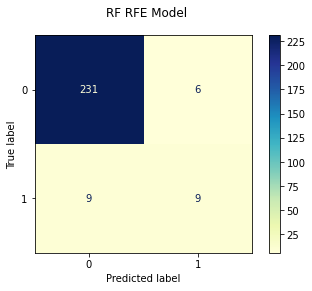

In [68]:
fig, ax = plt.subplots()

fig.suptitle("RF RFE Model")

plot_confusion_matrix(rfe, X_test, y_test, ax=ax, cmap="YlGnBu");

In [54]:
RF2 = RandomForestClassifier(random_state = 42)
RF2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
rf_train_preds = RF2.predict(X_train)
rf_test_preds = RF2.predict(X_test)
metrics_score(rf_train_preds, y_train, rf_test_preds, y_test)

Training Accuracy:	1.0 	Testing Accuracy:	0.9373
Training Precision:	1.0 	Testing Precision:	0.9312
Training Recall:	1.0 	Testing Recall:		0.9373
Training F1:		1.0 	Testing F1:		0.9336


In [81]:
knn = KNeighborsClassifier(n_neighbors=7, weights = 'distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [82]:

cross_val_score(knn, X_train, y_train, cv=5)

array([0.93137255, 0.92156863, 0.93137255, 0.9408867 , 0.93596059])

In [83]:
knn_train_preds = knn.predict(X_train)
knn_test_preds = knn.predict(X_test)
metrics_score(rf_train_preds, y_train, rf_test_preds, y_test)

Training Accuracy:	1.0 	Testing Accuracy:	0.949
Training Precision:	1.0 	Testing Precision:	0.9455
Training Recall:	1.0 	Testing Recall:		0.949
Training F1:		1.0 	Testing F1:		0.9469


In [84]:
df['target'].mean()

0.07069913589945012

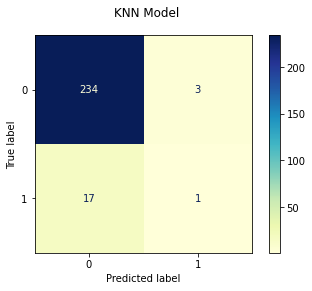

In [85]:
fig, ax = plt.subplots()

fig.suptitle("KNN Model")

plot_confusion_matrix(knn, X_test, y_test, ax=ax, cmap="YlGnBu");